In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
def logpdf_GAU_ND_1sample(x,mu,C):
    M = x.shape[0] # num of features of sample x
    mu = mu.reshape(M,1) # mean of the sample
    xc = x - mu # x centered
    invC = np.linalg.inv(C)
    _,log_abs_detC = np.linalg.slogdet(C)
    return -M/2 * np.log(2*np.pi) - 1/2 * log_abs_detC - 1/2 * np.dot(np.dot(xc.T,invC),xc)

In [114]:
def logpdf_GAU_ND(x,mu,C):
    M = x.shape[0] # num of features
    N = x.shape[1] # num of samples
    y = np.zeros(N) # array of N scalar elements
    for i in range(N):
        density_xi = logpdf_GAU_ND_1sample(x[:,i:i+1],mu,C)
        y[i] = density_xi
    return y

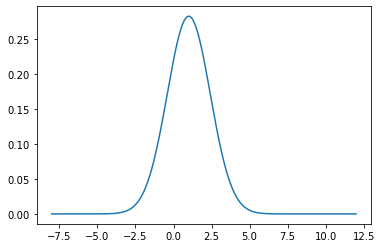

In [116]:
plt.figure()
XPlot = np.linspace(-8, 12, 1000).reshape(1,-1) # N=1000 samples of M=1 features -> it is a row vector
mu = np.ones((1,1)) * 1.0
C = np.ones((1,1)) * 2.0
y = logpdf_GAU_ND(XPlot,mu,C)
plt.plot(XPlot.ravel(), np.exp(y))
plt.show()

In [66]:
XND = numpy.load('XND.npy')
mu = numpy.load('muND.npy')
C = numpy.load('CND.npy')
pdfSol = numpy.load('llND.npy')
pdfGau = logpdf_GAU_ND(XND, mu, C)
print(numpy.abs(pdfSol - pdfGau).max())

LinAlgError: Singular matrix